In [2]:
import sys, os
# sys.path.append()
import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

In [3]:
# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

In [4]:
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_late = 0.1

In [5]:
train_loss_list = []
train_acc_list = []
test_acc_list = []

In [6]:
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 오차 역전파법으로 기울기를 구한다
    grad = network.gradient(x_batch, t_batch)

    # 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_late * grad[key]

        loss = network.loss(x_batch, t_batch)
        train_loss_list.append(loss)

        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            test_acc = network.accuracy(x_test, t_test)
            train_acc_list.append(train_acc)
            test_acc_list.append(test_acc)
            print(train_acc, test_acc)

0.211 0.22
0.21125 0.2202
0.22388333333333332 0.232
0.19641666666666666 0.2065
0.904 0.9073
0.904 0.9073
0.9046333333333333 0.9089
0.9046333333333333 0.9089
0.9222166666666667 0.9247
0.9222166666666667 0.9246
0.9227 0.9252
0.9227333333333333 0.9252
0.9353333333333333 0.9345
0.9352666666666667 0.9344
0.9349666666666666 0.9341
0.9349666666666666 0.9341
0.9444 0.9416
0.9444166666666667 0.9416
0.9445166666666667 0.9417
0.9445 0.9417
0.95215 0.9486
0.95215 0.9486
0.9521333333333334 0.9488
0.9521666666666667 0.9488
0.9571 0.9546
0.9571166666666666 0.9545
0.95745 0.955
0.9574833333333334 0.9551
0.9612 0.9569
0.9611666666666666 0.9569
0.9610333333333333 0.957
0.96105 0.957
0.9651166666666666 0.9613
0.96515 0.9613
0.9651 0.9609
0.9650833333333333 0.9609
0.9675666666666667 0.9643
0.9676 0.9643
0.9675 0.9642
0.9674833333333334 0.9642
0.9703333333333334 0.9653
0.9704333333333334 0.9651
0.97005 0.9647
0.9700333333333333 0.9647
0.9725 0.9662
0.9724833333333334 0.9662
0.9722 0.9659
0.9721666666666666

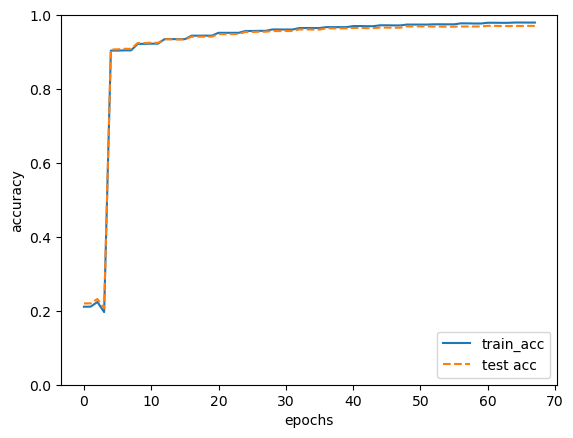

In [7]:
# 그래프 그리기
import matplotlib.pyplot as plt

markers = {'train':'o', 'test':'s'}
x = np.arange(len(train_acc_list))

plt.plot(x, train_acc_list, label='train_acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()